<a href="https://colab.research.google.com/github/Lisony/sigma.ai_kaggle/blob/jedrzej/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np

In [67]:
train = pd.read_csv('/content/kaggledigit_recognizer/train.csv')
test = pd.read_csv('/content/kaggledigit_recognizer/test.csv')
sample_submission = pd.read_csv('/content/kaggledigit_recognizer/sample_submission.csv')

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

X = train.copy()
y = X.pop('label')
X_test = test.copy()

# train_X = np.array(X)/255
# test_X = np.array(test_X)/255

# split training data, stratify - make sure all cases are evenly distributed
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8)

# normalize pixels
X_train = normalize(X_train, norm = 'max')
X_valid = normalize(X_valid, norm = 'max')
X_test = normalize(X_test, norm = 'max')

print("X_train shape: ", X_train.shape)
print("X_valid shape: ", X_valid.shape)
print("X_test shape: ", X_test.shape)

#set input_shape parameter
input_shape = [X_train.shape[1]]

X_train shape:  (33600, 784)
X_valid shape:  (8400, 784)
X_test shape:  (28000, 784)


In [69]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.BatchNormalization(input_shape = input_shape),
  layers.Dense(input_shape[0]/2 , activation = 'relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(256, activation = 'relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(64, activation = 'relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(64, activation = 'relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(10, activation= 'softmax')
])

In [70]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Epoch 1/50
66/66 [==============================] - 5s 59ms/step - loss: 0.9974 - accuracy: 0.6963 - val_loss: 0.6628 - val_accuracy: 0.8667
Epoch 2/50
66/66 [==============================] - 3s 49ms/step - loss: 0.3636 - accuracy: 0.8960 - val_loss: 0.3094 - val_accuracy: 0.9061
Epoch 3/50
66/66 [==============================] - 3s 49ms/step - loss: 0.2622 - accuracy: 0.9260 - val_loss: 0.2215 - val_accuracy: 0.9292
Epoch 4/50
66/66 [==============================] - 3s 49ms/step - loss: 0.2099 - accuracy: 0.9399 - val_loss: 0.1810 - val_accuracy: 0.9443
Epoch 5/50
66/66 [==============================] - 3s 49ms/step - loss: 0.1706 - accuracy: 0.9515 - val_loss: 0.1428 - val_accuracy: 0.9571
Epoch 6/50
66/66 [==============================] - 3s 49ms/step - loss: 0.1387 - accuracy: 0.9615 - val_loss: 0.1336 - val_accuracy: 0.9612
Epoch 7/50
66/66 [==============================] - 3s 49ms/step - loss: 0.1242 - accuracy: 0.9647 - val_loss: 0.1149 - val_accuracy: 0.9677
Epoch 8/50
66

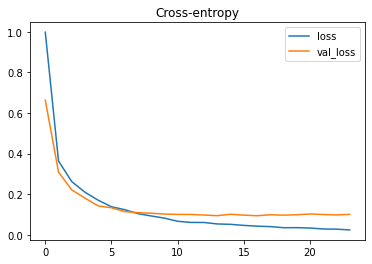

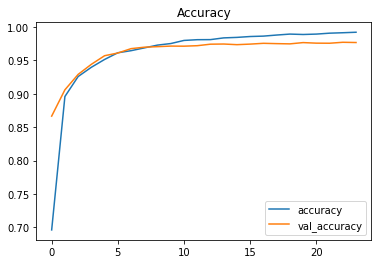

In [71]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")